# Migration Flows to Europe
---
---


  **Baris Alan**

Final Data Science Tutorial

CMPS 6790 - Data Science - Prof. Nicholas Mattei


[Online Access to the Project](https://barisalan00.github.io/)

[Project Datasets](https://github.com/barisalan00/barisalan00.github.io)

---

## Project Topic and Goals

The advanced liberal democracies in the Western world stand as an attractive destination for populations in the developing world, driven by a myriad of pull and push factors. Pull factors encompass liberal developed democracies offering employment opportunities, and providing rule of law and equal treatment before the law. Conversely, push factors comprise issues such as armed and social conflict, unemployment, poverty, corruption, poor governance, and the climate related risks. European countries, in particular, emerge as a desirable destination for numerous nations in Africa, the Middle East, and West Asia.

The primary objective of this project is to conduct a comprehensive analysis and visualization of migration flows to the European Union (EU) countries from regions outside Europe. The key areas of focus include examining the demographic structure and educational background of migrants, identifying their countries of origin and the EU countries they choose for settlement, and mapping out the migration routes and transit countries they navigate.

By addressing these aspects, the project aims to provide valuable insights into the dynamics of migration to the EU, shedding light on the factors influencing migration patterns and contributing to a nuanced understanding of the complex interplay between push and pull factors in the context of global migration.

Later on, this project aims to build a statistical model to measure the impact of various factors on migration flows to Europe: economic (GPD per capita and multidimensional poverty), political (political stability and effectiveness of government), gender (gender inequality), conflict (armed conflict and social unrest), and climate (climate related risks).

## Project Datasets
This project will utilize various datasets from different institutions.

#### The First Dataset
The primary dataset is sourced from [Eurostat](https://ec.europa.eu/eurostat), the official statistical administration of the EU. Specifically, I obtained the dataset from the [Migration and Population Statistics](https://ec.europa.eu/eurostat/statistics-explained/index.php?title=Migration_and_migrant_population_statistics) section, focusing on [immigration by age group, sex, and citizenship](https://ec.europa.eu/eurostat/databrowser/view/migr_imm1ctz__custom_10260387/default/table?lang=en). This dataset provides the total number of migrants based on specified filters, allowing researchers to analyze immigration by receiving country, immigrant citizenship, year, age group, and gender.

Due to Eurostat's data download limitations, careful selection of attributes was necessary. Specifically, (1) I narrowed down the country of citizenship options to 218, excluding EU countries to focus on immigration from other regions to Europe. Additionally, regional groupings such as Africa and South Asia were included for future analysis. (2) Receiving countries were limited to 27 EU nations. (3) Gender analysis was conducted for all available options (Male-Female-Total). (4) Age-based analysis was performed by selecting total and specific age brackets. (5) The dataset was filtered for the year 2021, with plans to include data from previous years for a comprehensive analysis of changing migration flows.

Key questions addressed with the first dataset include: "What is the total number of arrivals in EU countries in 2022?", "What are the demographic characteristics of immigrants based on gender and age?", and "Which EU countries received the highest number of immigrants?", and lastly "Which sent the highest number of immigrants?"

#### The Second Set of Datasets: ISO Codes
For the second dataset, [Datahub.io](https://datahub.io/core/country-list), to incorporate 2-digit country codes, was utilized. This dataset serves the sole purpose of associating country names witb country codes in the immigration dataset.

Some of the independent variable datasets use 3-digit country codes. Therefore, for better merging the main migration dataset with these independent variable datasets, the [UN ISO3 Dataset](https://data.apps.fao.org/catalog/dataset/iso-3-code-list-global-region-country/resource/f1b4b92d-8abd-43be-bea3-c0dc7f82ccf9) was also utilized to bring iso3 codes.

#### The Third-set of Datasets: Economic Indicators
To measure the effect of economic indicators, this project will utilize the GDP per capita (Purchasing Power Parity in 2017 Constant USD) dataset by the [World Bank](https://databank.worldbank.org/home). GPD/PC is the most common and one of the best indicator of overall economic wellbeing of a country.

Yet, because the average income might not reflect the well-being of the whole population, this research will include [World Bank Multidimensional Poverty Measurement](https://www.worldbank.org/en/topic/poverty/brief/multidimensional-poverty-measure) as well.


#### The Rest of Datasets
Key questions addressed using these sets of datasets that will provide the explanatory variables is: "What is the most important predictor of migration flows to Europe in 2022?". Therefore this project utilizes various datasets to bring independent variables into the analysis:
- [German Watch Climate Risk Index](https://www.germanwatch.org/en/cri) will be used to asses climate-realted factors,
- [ACLED Datasets](https://acleddata.com/dashboard/#/dashboard) will be used to retrieve the indicators for armed conflict and social conflicts,
- [World Bank World Governance Indicator](https://www.worldbank.org/en/publication/worldwide-governance-indicators) will be used to asses the political stability and government effectiveness,
- [UNDP Gender Inequality Index](https://hdr.undp.org/data-center/thematic-composite-indices/gender-inequality-index#/indicies/GII) will be helpful in understanding gender-related causes of migration flows.

The ultimate goal of this project is to build a statistical model to predict the migration flows to EU27 countries by using various economic, social, political, environmental and gender-related factors.

## ETL (Extract, Transform, Load)

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Clone the repository, change the wd
!git clone https://github.com/barisalan00/barisalan00.github.io
%cd /home/jovyan/barisalan00.github.io
!pwd

Cloning into 'barisalan00.github.io'...
remote: Enumerating objects: 132, done.
remote: Counting objects: 100% (80/80), done.
remote: Compressing objects: 100% (77/77), done.
remote: Total 132 (delta 38), reused 2 (delta 2), pack-reused 52 (from 1)
Receiving objects: 100% (132/132), 18.96 MiB | 861.00 KiB/s, done.
Resolving deltas: 100% (52/52), done.
/home/jovyan/barisalan00.github.io
/home/jovyan/barisalan00.github.io


### Import Datasets

In [3]:
# Main Immigration Dataset: Import Eurostat Immigration/2022 Dataset
euim22 = pd.read_csv('Eurostat-2022Migration-migr_imm1ctz__custom_10841676_linear.csv')
display(euim22.head(3))

# Total number of observations: 119479
display(len(euim22))

# Import Datahub.io 2-digit Country Codes dataset
country_codes2 = pd.read_csv('Datahub-CountryCodes-data_csv.csv')
display(country_codes2.head(3))

# Import UN 3-digit Country Codes dataset
country_codes3 = pd.read_csv('UN-iso3.csv')
display(country_codes3.head(3))

# Economic Indicator1: WB 2022 GDP/PC
gdppc = pd.read_csv('WB-2022GDPPC-Const.csv')
display(gdppc.head(3))

# Economic Indicator2: WB 2023 Multidimensional Poverty Measure
mpm = pd.read_excel('WB-2022MPM-Data-AM2022.xlsx')
display(mpm.head(3))

# Conflict Indicator1: ACLED 2022 Battles Dataset
battle = pd.read_csv('ACLED-2022Battles.csv')
display(battle.head(3))

# Conflict Indicator2: ACLED 2022 Riots Dataset
riot = pd.read_csv('ACLED-2022Riots.csv')
display(riot.head(3))

# Conflict Indicator3: ACLED 2022 Violence Dataset
violence = pd.read_csv('ACLED-2022ViolencesCivilians.csv')
display(violence.head(3))

# Political Indicators: WB Governance Indicators
govern = pd.read_csv('WB-2022GovIndic.csv')
display(govern.head(3))

# Climate Indicator: German Watch Climate Risk Index
climate = pd.read_csv('GermanWatch-2018CRI.csv')
display(climate.head(3))

# Gender Equality Indicator: UNDP Gender Inequality Index
gender = pd.read_excel('UNDP-2022GII-HDR23-24_Statistical_Annex_GII_Table.xlsx')
display(gender.head(3))

,DATAFLOW,LAST UPDATE,freq,citizen,agedef,age,unit,sex,geo,TIME_PERIOD,OBS_VALUE,OBS_FLAG
0,ESTAT:MIGR_IMM1CTZ(1.0),27/03/24 11:00:00,A,AD,REACH,TOTAL,NR,F,AT,2022,0,NaN
1,ESTAT:MIGR_IMM1CTZ(1.0),27/03/24 11:00:00,A,AD,REACH,TOTAL,NR,F,BG,2022,0,NaN
2,ESTAT:MIGR_IMM1CTZ(1.0),27/03/24 11:00:00,A,AD,REACH,TOTAL,NR,F,CZ,2022,0,NaN


119479

,Name,Code
0,Afghanistan,AF
1,Åland Islands,AX
2,Albania,AL


,iso3,name
0,BEL,Belgium
1,CH_,"China, mainland"
2,GGY,Guernsey


,Country Name,Country Code,Series Name,Series Code,2022 [YR2022]
0,Afghanistan,AFG,"GDP per capita, PPP (constant 2017 internation...",NY.GDP.PCAP.PP.KD,..
1,Africa Eastern and Southern,AFE,"GDP per capita, PPP (constant 2017 internation...",NY.GDP.PCAP.PP.KD,3566.269439
2,Africa Western and Central,AFW,"GDP per capita, PPP (constant 2017 internation...",NY.GDP.PCAP.PP.KD,4066.48323


,Region,Country code,Economy,Reporting year,Survey name,Survey year,Survey coverage,Welfare type,Survey comparability,Monetary (%),Educational attainment (%),Educational enrollment (%),Electricity (%),Sanitation (%),Drinking water (%),Multidimensional poverty headcount ratio (%)
0,ECA,ALB,Albania,2018,HBS,2018,N,c,3.0,0.048107,0.192380,-,0.06025,6.579772,9.594966,0.293161
1,SSA,AGO,Angola,2018,IDREA,2018,N,c,2.0,31.122005,29.753423,27.44306,52.639532,53.637516,32.106507,47.203606
2,LAC,ARG,Argentina,2021,EPHC-S2,2021,U,i,2.0,0.958847,1.085320,0.731351,0,0.193965,0.364048,0.971202


,event_id_cnty,event_date,year,time_precision,disorder_type,event_type,sub_event_type,actor1,assoc_actor_1,inter1,...,location,latitude,longitude,geo_precision,source,source_scale,notes,fatalities,tags,timestamp
0,DRC27768,31-Dec-22,2022,1,Political violence,Battles,Armed clash,M23: March 23 Movement,NaN,2,...,Karenga,-1.4724,29.0655,2,Mediacongo.net; Radio Okapi,National,"On 31 December 2022, during a two-day battle, ...",0,NaN,1673291085
1,MZM3154,31-Dec-22,2022,1,Political violence,Battles,Armed clash,Islamist Militia (Mozambique),NaN,3,...,Namacule,-11.8567,39.8000,1,AIM; Pinnacle News; Twitter; Zitamar,New media-National,"On 31 December 2022, Islamist militia clashed ...",2,NaN,1673291088
2,MZM3155,31-Dec-22,2022,1,Political violence,Battles,Armed clash,Islamist Militia (Mozambique),NaN,3,...,Namande,-11.8278,39.7416,1,AIM; Pinnacle News; Twitter; VOA; Zitamar,New media-National,"On 31 December 2022, Islamist militia clashed ...",2,NaN,1673291088


,event_id_cnty,event_date,year,time_precision,disorder_type,event_type,sub_event_type,actor1,assoc_actor_1,inter1,...,location,latitude,longitude,geo_precision,source,source_scale,notes,fatalities,tags,timestamp
0,KEN9717,31 December 2022,2022,1,Political violence,Riots,Mob violence,Rioters (Kenya),Vigilante Group (Kenya),5,...,Kutus,-0.5753,37.3269,2,Kenya Standard; NTV (Kenya),New media-National,"On 31 December 2022, a mob lynched a man, part...",1,crowd size=no report,1673291087
1,BRA62473,31 December 2022,2022,1,Political violence,Riots,Mob violence,Rioters (Brazil),Vigilante Group (Brazil),5,...,Maues,-3.3795,-57.7196,1,Portal do Holanda,Subnational,"On 31 December 2022, in Maues (Amazonas), a su...",0,crowd size=no report,1673295343
2,BRA62488,31 December 2022,2022,1,Political violence,Riots,Mob violence,Rioters (Brazil),PL: Liberal Party,5,...,Catalao,-18.1670,-47.9448,1,Estado de Minas,National,"Property destruction: On 31 December 2022, in ...",0,crowd size=no report,1673295343


,event_id_cnty,event_date,year,time_precision,disorder_type,event_type,sub_event_type,actor1,assoc_actor_1,inter1,...,location,latitude,longitude,geo_precision,source,source_scale,notes,fatalities,tags,timestamp
0,DRC27766,31 December 2022,2022,1,Political violence,Violence against civilians,Abduction/forced disappearance,Twirwaneho Ethnic Militia (Democratic Republic...,Banyamulenge Ethnic Militia (Democratic Republ...,4,...,Mikenge,-3.4497,28.4476,1,Kivu Times,Subnational,"On 31 December 2022, Twirwaneho abducted a wom...",0,NaN,1673291085
1,SAF18067,31 December 2022,2022,1,Political violence,Violence against civilians,Attack,Unidentified Armed Group (South Africa),NaN,3,...,Johannesburg,-26.2023,28.0436,1,Zambia Reports,International,"On 31 December 2022, unknown suspects shot and...",1,NaN,1673291088
2,SOM38915,31 December 2022,2022,1,Political violence,Violence against civilians,Abduction/forced disappearance,Al Shabaab,NaN,2,...,Ted,4.4000,43.9167,2,Undisclosed Source,Local partner-Other,"On 31 December 2022, Al Shabaab abducted three...",0,NaN,1673291088


,Country Name,Country Code,Series Name,Series Code,2022 [YR2022]
0,Afghanistan,AFG,Political Stability and Absence of Violence/Te...,PV.EST,-2.550801754
1,Afghanistan,AFG,Voice and Accountability: Estimate,VA.EST,-1.751587272
2,"Korea, Dem. People's Rep.",PRK,Voice and Accountability: Percentile Rank,VA.PER.RNK,0


,CRI\rRank,Country,CRI\rscore,Fatalities\rin 2018\r(Rank),Fatalities per\r100 000 inhab-\ritants (Rank),Losses in mil-\rlion US$ (PPP)\r(Rank),Losses per\runit GDP in\r% (Rank)
0,1,Japan,5.50,2,2,3,12
1,2,Philippines,11.17,4,14,7,14
2,3,Germany,13.83,3,1,6,36


,HDI Ranking,Country,GII,GII Ranking,Maternal mortality ratio,Adolescent birth rate,Share of seats in parliament,Population with at least some secondary education-Female,Population with at least some secondary education-Male,Labour force participation rate-Female,Labour force participation rate-Male
0,1,Switzerland,0.018,3,7.378755,2.200,39.02439,96.939726,97.517437,61.49,71.94
1,2,Norway,0.012,2,1.663741,2.195,44.970414,99.094031,99.27498,62.53,69.59
2,3,Iceland,0.039,9,2.654418,5.077,47.619048,99.768417,99.662552,70.7,78.29


### Transform and Tidy Data

In [4]:
# Check the dtypes for euim22
# The year (TIME_PERIOD) and flow (OBS_VALUE) columns are integer, and the rest is object as expected.
euim22.dtypes

DATAFLOW       object
LAST UPDATE    object
freq           object
citizen        object
agedef         object
age            object
unit           object
sex            object
geo            object
TIME_PERIOD     int64
OBS_VALUE       int64
OBS_FLAG       object
dtype: object

In [5]:
# Keep only necessary columns and drop redundant ones
euim22 = euim22[['citizen', 'age', 'sex', 'geo', 'TIME_PERIOD', 'OBS_VALUE']]
euim22.head()

,citizen,age,sex,geo,TIME_PERIOD,OBS_VALUE
0,AD,TOTAL,F,AT,2022,0
1,AD,TOTAL,F,BG,2022,0
2,AD,TOTAL,F,CZ,2022,0
3,AD,TOTAL,F,EE,2022,0
4,AD,TOTAL,F,FI,2022,0


In [6]:
# Rename columns for readability
euim22.rename(columns={'citizen':'Migrant_Citizenship',
                        'age': 'Age',
                        'sex': 'Gender',
                        'geo':'Receiving_CCode',
                        'TIME_PERIOD':'Year',
                        'OBS_VALUE':'Flow'},inplace=True)
euim22.head()

,Migrant_Citizenship,Age,Gender,Receiving_CCode,Year,Flow
0,AD,TOTAL,F,AT,2022,0
1,AD,TOTAL,F,BG,2022,0
2,AD,TOTAL,F,CZ,2022,0
3,AD,TOTAL,F,EE,2022,0
4,AD,TOTAL,F,FI,2022,0



---
Despite the Eurostat data dashboard displaying country names for the country codes, the downloaded dataset does not include country names. This is why I will leverage the "country_codes2" dataset from datahub.io to retrieve country names for both Citizenship and Receiving Country Code codes. This step ensures a comprehensive and accurate representation of country names in the analysis.

---

In [7]:
# Bring country name information for Migrant Citizenship column (left join to keep all observations at euim_21)
euim22 = pd.merge(euim22, country_codes2, left_on='Migrant_Citizenship', right_on='Code', how='left')

# Drop the redundant "Code" column
euim22.drop('Code', axis=1, inplace=True)

# Rename the 'Name' column to 'Sending_Country'
euim22.rename(columns={'Name':'Sending_Country'}, inplace=True)

# Move Migrant_Country after Migrant_Citizenship
col = euim22.pop('Sending_Country')
euim22.insert(1, col.name, col)


euim22.head()

,Migrant_Citizenship,Sending_Country,Age,Gender,Receiving_CCode,Year,Flow
0,AD,Andorra,TOTAL,F,AT,2022,0
1,AD,Andorra,TOTAL,F,BG,2022,0
2,AD,Andorra,TOTAL,F,CZ,2022,0
3,AD,Andorra,TOTAL,F,EE,2022,0
4,AD,Andorra,TOTAL,F,FI,2022,0


In [8]:
# Bring country name information for Receiving Country Column (left join to keep all observations at euim_22)
euim22 = pd.merge(euim22, country_codes2, left_on='Receiving_CCode', right_on='Code', how='left')

# Drop the redundant "Code" column
euim22.drop('Code', axis=1, inplace=True)

# Rename the 'Name' column to 'Receiving_Country'
euim22.rename(columns={'Name':'Receiving_Country'}, inplace=True)

# Move Receiving_Country after Receiving_CCode
col = euim22.pop('Receiving_Country')
euim22.insert(5, col.name, col)


euim22.head()

,Migrant_Citizenship,Sending_Country,Age,Gender,Receiving_CCode,Receiving_Country,Year,Flow
0,AD,Andorra,TOTAL,F,AT,Austria,2022,0
1,AD,Andorra,TOTAL,F,BG,Bulgaria,2022,0
2,AD,Andorra,TOTAL,F,CZ,Czech Republic,2022,0
3,AD,Andorra,TOTAL,F,EE,Estonia,2022,0
4,AD,Andorra,TOTAL,F,FI,Finland,2022,0


In [9]:
# Check if we lost any cells at the merge operations.
# We had 119479 observations at the beginning, and and it is still there, we are not missing anything.
len(euim22)

119479

In [10]:
# Is there any missing values under Receiving_Country?
# 'EL' is country code for Greece. Greece is using both 'GR' (in international systems) and 'EL' (in European systems) as its country code.
# 'EU27_2020' is the code for 27 EU countries.
euim22[euim22['Receiving_Country'].isna()]['Receiving_CCode'].unique()

array(['EL', 'EU27_2020'], dtype=object)

In [11]:
# Fill these NaN values for 'EL' with Greece
euim22.loc[euim22['Receiving_CCode'] == 'EL', 'Receiving_Country'] = 'Greece'
euim22.loc[euim22['Receiving_CCode'] == 'EU27_2020', 'Receiving_Country'] = 'EU27'

euim22[(euim22['Receiving_CCode']=='EL') | (euim22['Receiving_CCode']=='EU27_2020')].head(5)


,Migrant_Citizenship,Sending_Country,Age,Gender,Receiving_CCode,Receiving_Country,Year,Flow
21798,CC8_22_FOR,NaN,TOTAL,F,EL,Greece,2022,18332
21800,CC8_22_FOR,NaN,TOTAL,F,EU27_2020,EU27,2022,1406470
21830,CC8_22_FOR,NaN,TOTAL,M,EL,Greece,2022,10646
21832,CC8_22_FOR,NaN,TOTAL,M,EU27_2020,EU27,2022,952353
21862,CC8_22_FOR,NaN,TOTAL,T,EL,Greece,2022,28978


In [12]:
# Are all receiving countries EU27? Iceland, Liechstein, Norway, Switzerland are not EU27.
display(euim22['Receiving_Country'].unique())

array(['Austria', 'Bulgaria', 'Czech Republic', 'Estonia', 'Finland',
       'Croatia', 'Hungary', 'Iceland', 'Italy', 'Lithuania',
       'Luxembourg', 'Latvia', 'Netherlands', 'Norway', 'Romania',
       'Sweden', 'Slovenia', 'Slovakia', 'Spain', 'France', 'Belgium',
       'Switzerland', 'Cyprus', 'Germany', 'Denmark', 'Greece', 'EU27',
       'Ireland', 'Liechtenstein', 'Malta', 'Poland', 'Portugal'],
      dtype=object)

In [13]:
# Drop these 4 countries: Now we have 27 EU countries + 1 EU27 Aggregated observation
countries_to_drop = ['Iceland', 'Liechtenstein', 'Norway', 'Switzerland']
euim22 = euim22[~euim22['Receiving_Country'].isin(countries_to_drop)]
eu27 = (euim22['Receiving_Country'].unique())
print(eu27)

['Austria' 'Bulgaria' 'Czech Republic' 'Estonia' 'Finland' 'Croatia'
 'Hungary' 'Italy' 'Lithuania' 'Luxembourg' 'Latvia' 'Netherlands'
 'Romania' 'Sweden' 'Slovenia' 'Slovakia' 'Spain' 'France' 'Belgium'
 'Cyprus' 'Germany' 'Denmark' 'Greece' 'EU27' 'Ireland' 'Malta' 'Poland'
 'Portugal']


In [14]:
# Is there any NaN cells under Sending_Country column? --> 20017 observations are missing.
euim22['Sending_Country'].isna().sum()

20017

In [15]:
# Let's check the unique values for these 20017 NaN observations.
euim22[euim22['Sending_Country'].isna()]['Migrant_Citizenship'].unique()

array(['AFR', 'AFR_C', 'AFR_E', 'AFR_N', 'AFR_S', 'AFR_W', 'AME', 'AME_C',
       'AME_N', 'AME_S', 'ASI', 'ASI_C', 'ASI_E', 'ASI_S', 'ASI_S_E',
       'ASI_W', 'AU_NZ', 'CC8_22_FOR', 'CRB', 'CZ_SK', 'EFTA_FOR', 'EL',
       'EU27_2020_FOR', 'EUR', 'EX_SU', 'EX_YU', 'FOR_STLS', 'MEL', 'MIC',
       'NAT', 'NEU27_2020_FOR', 'OCE', 'POL', 'RNC', 'RS_ME', 'STLS',
       'TOTAL', 'UK', 'UNK', 'XK'], dtype=object)


---
The NaN values under the "Sending_Country" column correspond to the codes displayed in the array above. Notably, these codes are not 2-digit but rather 3-digit.

As per the Eurostat system, most of these codes represent continents such as 'AFR'=Africa, 'ASI_W'=West Asia, which aggregate the sum of countries within these continents. While the immigrant numbers for continents may introduce duplicates, they remain crucial for continental flow analysis.

Additionally, specific codes represent regions such as 'AU_NZ': Australia-New Zealand, 'CC8_22_FOR':8 Candidate Countries, 'CZ_SK': Czechoslovakia, 'EFTA_FOR':European Free Trade Association Countries, 'EL':Greece, 'EU27_2020_FOR':EU27 Countries except reporting country,'EUR':Europe, 'EX_SU':Soviet Union, 'EX_Yu':Yugoslavia, 'FOR_STLS':Foreign country and stateless, 'NAT': Reporting Country, 'NEU27_2020_FOR':Non-EU27 countries nor reporting country, Oceania, 'RNC': Recognized Non-Citizens, 'RS_ME':Serbia and Montenegro, 'STLS': Stateless, 'TOTAL': Total, 'UNK': Unknown, 'XK':Kosovo.

For analytical purposes, all continents and regional observations will be excluded from the primary analysis. A secondary continental dataset will be created, and these observations will be removed from the original "euim22" dataset to prevent duplication. However, 'STLS': Stateless, 'RNC': Recognized Non-Citizens, 'UNK': Unknown observations will be retained in the original dataset, as these observations are not represented under any country-observations and can be treated as distinct entities. 'EU27_2020_FOR', 'NEU27_2020_FOR', and 'TOTAL' will also kept in the dataset for calculations.

---


In [16]:
# Replace the NaN Values under Migrant_Country for these ('STLS':Stateless, 'RNC':Recognized Non-Citizens and 'UNK':Unknown) under Migrant_Ciizenship
# Therefore all non-NaN observatoins under Migrant_Country column are part of our analysis.
euim22.loc[euim22[euim22['Migrant_Citizenship'] == 'STLS'].index, 'Sending_Country'] = 'Stateless'
euim22.loc[euim22[euim22['Migrant_Citizenship'] == 'RNC'].index, 'Sending_Country'] = 'Recognized Non-Citizens'
euim22.loc[euim22[euim22['Migrant_Citizenship'] == 'UNK'].index, 'Sending_Country'] = 'Unkown'
euim22.loc[euim22[euim22['Migrant_Citizenship'] == 'EU27_2020_FOR'].index, 'Sending_Country'] = 'EU27'
euim22.loc[euim22[euim22['Migrant_Citizenship'] == 'NEU27_2020_FOR'].index, 'Sending_Country'] = 'Non-EU27'
euim22.loc[euim22[euim22['Migrant_Citizenship'] == 'TOTAL'].index, 'Sending_Country'] = 'Total'
euim22.loc[euim22[euim22['Migrant_Citizenship'] == 'EL'].index, 'Sending_Country'] = 'Greece'


# How many missing values now: 15129
display(euim22['Sending_Country'].isna().sum())

15129

In [17]:
# Create a 2nd dataset to keep continental observations.
euim22_continents = euim22

# Now we can delete the continent observations from the euim22 (which are NA observations under Sending_Country column)
euim22 = euim22.dropna(subset=['Sending_Country'])

# NEw dataframe is 93370 length.
len(euim22)

93370

In [18]:
#Some extra re-naming for easier coding
euim22.loc[euim22[euim22['Age'] == 'TOTAL'].index, 'Age'] = 'T'
euim22.loc[euim22[euim22['Migrant_Citizenship'] == 'TOTAL'].index, 'Migrant_Citizenship'] = 'Total'

## Basic Summary Statistics

**How many immigrants did arrive in the EU countries in 2022 from non-European countries?**

According to [Frontex (EU Border and Coast Guard AgencySecurity)](https://www.frontex.europa.eu/) and [Eurostat](https://ec.europa.eu/eurostat/statistics-explained/index.php?title=Migration_and_migrant_population_statistics) a total of 5.1 million immigrants entered to EU countries from non-EU countries, which is a 117% compared to 2021 (2.7 million).

Our dataset (code below) reveals that the total number of arrivals to EU27 amounts to almost 7 million individuals. Among these, 4.8 million immigrants originated from non-EU27 countries, while 1.1 million arrived from other EU27 countries.

Germany emerges as the top destination, with a total of 2.1 million immigrants arriving, followed by Spain (1.2 million), France (430K), and Italy (410K).


In [19]:
# Total number of immigration to EU27 from and total number of immigration from non-EU27
euim22[(euim22['Sending_Country'].apply(lambda x: x in ['Total', 'EU27', 'Non-EU27'])) & (euim22['Receiving_Country']=='EU27') & (euim22['Age']=='T') & (euim22['Gender']=='T')].sort_values(by='Flow', ascending=False)

,Migrant_Citizenship,Sending_Country,Age,Gender,Receiving_CCode,Receiving_Country,Year,Flow
106898,Total,Total,T,T,EU27_2020,EU27,2022,6977742
78980,NEU27_2020_FOR,Non-EU27,T,T,EU27_2020,EU27,2022,4777475
38564,EU27_2020_FOR,EU27,T,T,EU27_2020,EU27,2022,1098032


In [20]:
# Total number of arrivals by reciving EU27 countries
euim22[(euim22['Sending_Country']=='Total') & (euim22['Age']=='T') & (euim22['Gender']=='T')].sort_values(by='Flow', ascending=False).head(5)

,Migrant_Citizenship,Sending_Country,Age,Gender,Receiving_CCode,Receiving_Country,Year,Flow
106898,Total,Total,T,T,EU27_2020,EU27,2022,6977742
106893,Total,Total,T,T,DE,Germany,2022,2071690
106897,Total,Total,T,T,ES,Spain,2022,1258894
106900,Total,Total,T,T,FR,France,2022,431017
106905,Total,Total,T,T,IT,Italy,2022,410985


In [21]:
# Total number of arrivals from non-EU27 countries
euim22[(euim22['Sending_Country']=='Non-EU27') & (euim22['Age']=='T') & (euim22['Gender']=='T')].sort_values(by='Flow', ascending=False).sort_values(by='Flow', ascending=False).head(5)

,Migrant_Citizenship,Sending_Country,Age,Gender,Receiving_CCode,Receiving_Country,Year,Flow
78980,NEU27_2020_FOR,Non-EU27,T,T,EU27_2020,EU27,2022,4777475
78975,NEU27_2020_FOR,Non-EU27,T,T,DE,Germany,2022,1630619
78979,NEU27_2020_FOR,Non-EU27,T,T,ES,Spain,2022,925587
78974,NEU27_2020_FOR,Non-EU27,T,T,CZ,Czech Republic,2022,330997
78987,NEU27_2020_FOR,Non-EU27,T,T,IT,Italy,2022,287010


In [22]:
# Create a new dataset by dropping the 'Total', 'EU27', and 'Non-EU27' observations under 'Sending_Country', and 'EU27' under 'Receiving'
# Total number of observations decreased to 90958.
immig22 = euim22[~euim22['Sending_Country'].isin(['Total', 'EU27', 'Non-EU27'])]
len(immig22)

90958

In [23]:
# Drop 'EU27' under 'Receiving_Country' 
# Total number of observations decreased to 90952.
immig22 = immig22[~immig22['Receiving_Country'].isin(['EU27'])]
len(immig22)

90952

**Crucial Note on Migration Dataset**

The Eurostat immigration dataset offers observations that provide the total number of arrivals (including 'Total' for total arrivals, 'EU27' for total arrivals within the EU27, and 'Non-EU27' for total arrivals from non-EU27 countries)\ enabling a comprehensive view of aggregate numbers. According to these observations the total arrivals to EU27 countries amount to 7 million, with 4.8 million originating from non-EU27 countries.

However, upon removing these 'Total' observations to eliminate duplicates and examining the total number of arrivals by filtering the receiving country, we find a significantly lower figure of 3.4 million. Of this immigration flow, 1.1 million arrivals are from other EU27 countries, while 2.2 million are from non-EU27 countries.

These numbers starkly contrast with aggregate observations from Frontex and Eurostat, primarily due to the exclusion of certain Sending_Country observations in the dataset. For instance, while aggregate data suggests Germany received 2.1 million immigrants, of which 1.6 million were from non-EU countries, a closer examination of arrivals to Germany by filtering the Sending_Country reveals only 6226 migrants, recorded as Stateless or Unknown, arrived in Germany.

It is evident that our dataset contains missing values under the Sending_Country column, as exemplified by the absence of Sending_Country information for arrivals in Germany. Consequently, this dataset is limited in its ability to analyze migration flows comprehensively, particularly those from non-EU27 countries to EU27 countries.

The datasets by various organizations and projects focusing on international migration, including the International Migration Organization, Global Migration Data Portal, UN Global Migration Database, OECD International Migration Database, and World Bank Global Bilateral Migration, were checked. However, none of these sources provide a complete dataset of bilateral migration flows. At present, the Eurostat dataset stands as the most comprehensive option. Efforts are underway to obtain a full dataset from Eurostat officials, but until then, this project will utilize the available data.

In [24]:
# What is total number of arrivals? 3.4 million.
immig22[(immig22['Age']=='T') & (immig22['Gender']=='T')]['Flow'].sum()

3406513

In [25]:
# Total number of arrivals from EU27 countries: 1.1 million
immig22[(immig22['Sending_Country'].isin(eu27)) & (immig22['Age']=='T') & (immig22['Gender']=='T')]['Flow'].sum()

1171307

In [26]:
# Total number of arrivals from non-EU27 countries: 2.2 million.
immig_noneu27 = immig22[~immig22['Sending_Country'].isin(eu27)]
immig_noneu27[(immig_noneu27['Age']=='T') & (immig_noneu27['Gender']=='T')]['Flow'].sum()

2235206

In [27]:
# Total number of arrivals in Germany from non-EU27 countries: 6226
immig_noneu27[(immig_noneu27['Receiving_Country']=='Germany') & (immig_noneu27['Age']=='T') & (immig_noneu27['Gender']=='T')]['Flow'].sum()
display(immig_noneu27[immig_noneu27['Receiving_Country']=='Germany']['Sending_Country'].unique())

array(['Stateless', 'Unkown'], dtype=object)

**How does the gender distribution among immigrants break down?**

It appears that there were more men than women arriving in the EU from non-EU27 countries in 2022. A significant contributing factor to this trend is the presence of irregular migrants, who enter the EU illegally by crossing the Mediterranean and Aegean seas with the assistance of smugglers. Due to the perilous nature of these routes and the life-threatening aspects of the journey, men often aim to arrive first to secure asylum before bringing their families. Additionally, in regions such as the Middle East, Africa, and South Asia, young unmarried men are more likely to immigrate to Europe compared to young unmarried women.

The gender breakdown holds importance for various reasons. Some groups advocate for the inclusion of women, children, and the elderly while excluding men, while others argue that there is a labor shortage in the European labor market, making adult men crucial in filling this gap. More conservative groups express concerns about the potential impact of adult male immigrants on distorting European society. Therefore, understanding the gender and age demographics is crucial to assessing the validity of such perceived threats.

Gender
F    1142144
M    1092917
T    2235206
Name: Flow, dtype: int64


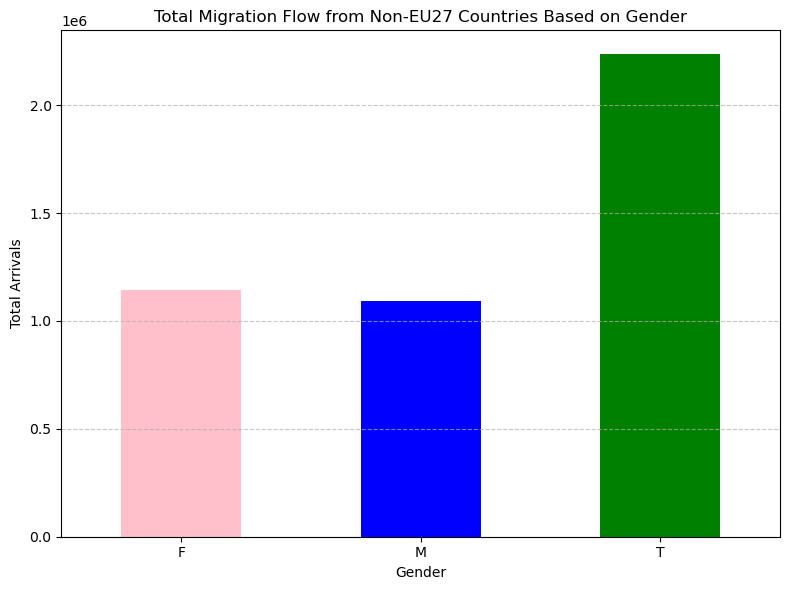

In [28]:
# Group by 'Gender' column and sum 'Flow' column
immig_gender = immig_noneu27[(immig_noneu27['Age'] == 'T')].groupby('Gender')['Flow'].sum()
print(immig_gender)

plt.figure(figsize=(8, 6))

plot_gender = immig_gender.plot(kind='bar', color=['pink','blue', 'green'])
plt.xlabel('Gender')
plt.ylabel('Total Arrivals')
plt.title('Total Migration Flow from Non-EU27 Countries Based on Gender')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


**What about age demographics?**

Approximately 52% (around 1.1 million) of arriving immigrants are 34 years old or younger, with 323K falling within the age range of 15 years or younger. From the perspective of certain groups within the EU, these numbers may be perceived as a potential threat to European society. An additional observation is that as age increases, the number of immigrants arriving decreases, as depicted in the accompanying plot.

However, from a humanitarian standpoint, these figures underscore the desperation of immigrants who, in the face of civil war, economic hardships, or climate-related challenges, flee their home countries with their children, aspiring to reach Europe. Those in the age group of 20-29 are often individuals who have completed their education or recently started a family but struggle to make a living in their home countries. Frustration with poverty, corruption, and economic challenges compels them to seek better living conditions in Europe.

As future milestones incorporate additional datasets into the analysis, a clearer picture will emerge regarding the underlying reasons behind these migration patterns.

Age
TOTAL          NaN
Y_LT15    323229.0
Y15-19    145583.0
Y20-24    199836.0
Y25-29    258376.0
Y30-34    247847.0
Y35-39    212671.0
Y40-44    162976.0
Y45-49    117268.0
Y50-54     83435.0
Y55-59     56993.0
Y60-64     45407.0
Y_GE65     67215.0
Name: Flow, dtype: float64

Text(0.5, 1.0, 'Total Flow Based on Age Breaks')

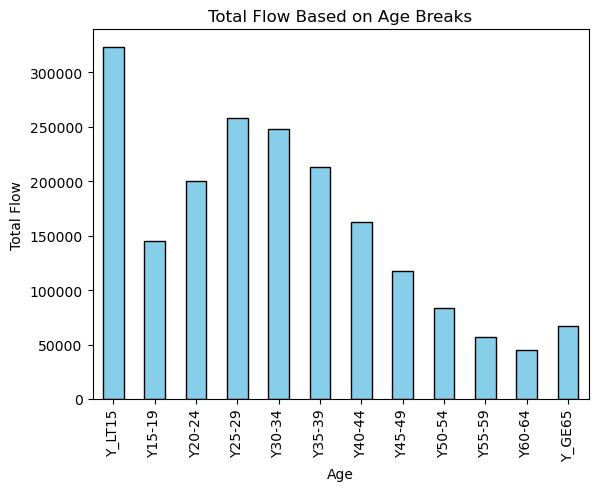

In [29]:
# Take the total ('T') from Gender column, and groupby 'Age'.
# Y_LT15: those below 15, and Y_GE65: those above 65. Other age breaks already make sense.
# reindex the age brackets in order
immig_age = immig_noneu27[(immig_noneu27['Gender'] == 'T')].groupby('Age')['Flow'].sum()

# Reindex the age breaks from smallest to biggest
display(immig_age.reindex(['TOTAL','Y_LT15', 'Y15-19', 'Y20-24', 'Y25-29', 'Y30-34', 'Y35-39', 'Y40-44', 'Y45-49', 'Y50-54', 'Y55-59', 'Y60-64', 'Y_GE65']))

#Plot
plot_age = immig_age.reindex(['Y_LT15', 'Y15-19', 'Y20-24', 'Y25-29', 'Y30-34', 'Y35-39', 'Y40-44', 'Y45-49', 'Y50-54', 'Y55-59', 'Y60-64', 'Y_GE65']).plot(kind='bar', color='skyblue', edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Total Flow')
plt.title('Total Flow Based on Age Breaks')

**Which EU countries receive the highest number of immigrants?**

_Before going into the details it is worth reminding the limited nature of this dataset. As clarified above, Germany received a total number of 1.6 immigrants from non-EU27 countries, yet this dataset only represent 6226 immigrants._

Initially, both the plot and the list below indicate that Spain and Italy have received more than half of the total immigrants. This observation underscores that Africa and the Middle East remain the primary regions of origin for migrants.

Additionally, the substantial influx of immigrants into Central and Eastern EU countries is noteworthy, signifying the impact of the Invasion of Ukraine. This surge in migration patterns in these regions is a notable consequence of the geopolitical events in Ukraine.

Receiving_Country
Spain             857915
Czech Republic    330362
Italy             283740
Netherlands       189198
Austria           115919
Romania            91019
Lithuania          66139
Sweden             54356
Hungary            43601
Croatia            40073
Estonia            38898
Finland            33014
Latvia             29800
Slovenia           24269
Luxembourg         14555
Bulgaria           13885
Germany             6226
Belgium              922
Slovakia             561
Denmark              380
Ireland              297
Poland                77
France                 0
Malta                  0
Cyprus                 0
Portugal               0
Greece                 0
Name: Flow, dtype: int64


Text(0.5, 1.0, 'Total Flow Based on Receiving Country')

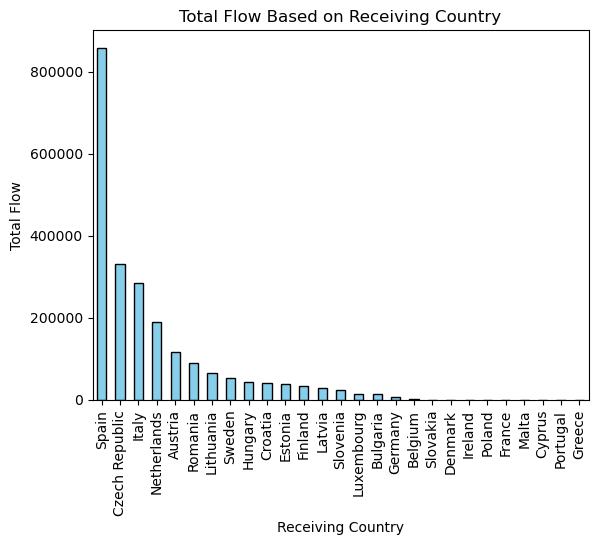

In [30]:
# Total immigrants by receiving country
total_by_receiving = immig_noneu27[(immig_noneu27['Age'] == 'T') & (immig_noneu27['Gender'] == 'T')].groupby('Receiving_Country')['Flow'].sum()

# Sort them
total_by_receiving = total_by_receiving.sort_values(ascending=False)

print(total_by_receiving)

#Plot
total_by_receiving.plot(kind='bar', color='skyblue', edgecolor='black')
plt.xlabel('Receiving Country')
plt.ylabel('Total Flow')
plt.title('Total Flow Based on Receiving Country')

**Which country has sent the highest number of immigrants to EU countries?**

Concurrently with the aforementioned analysis, the table and plot below reveal that Ukraine, Latin American Countries, and North African Countries are the primary sources of immigration. It is not unexpected to find China and India on these lists, given that they are the two most populous countries globally.

Sending_Country
Ukraine                              764356
Colombia                             176955
Morocco                              138886
Venezuela, Bolivarian Republic of     85238
Peru                                  74722
India                                 59999
Russian Federation                    52933
Argentina                             49531
Pakistan                              42479
Syrian Arab Republic                  42466
Name: Flow, dtype: int64

Text(0.5, 1.0, 'Total Flow Based on Sending Country')

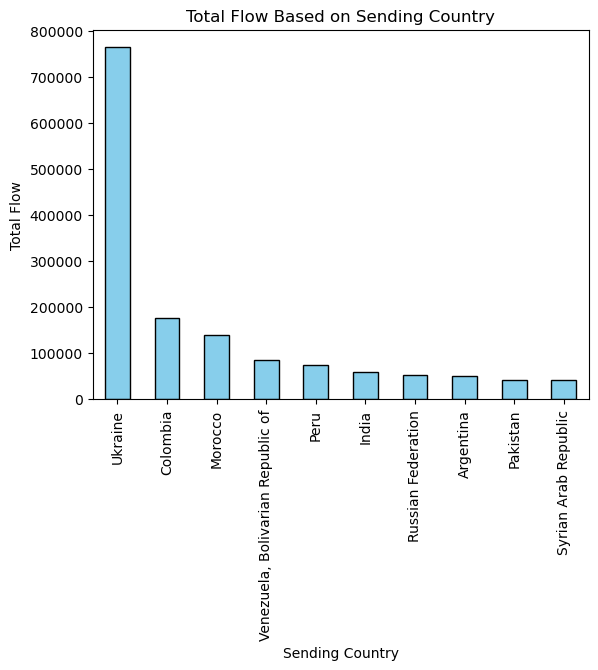

In [31]:
# Total number of immigrants by sending country
total_by_sending = immig_noneu27[(immig_noneu27['Age'] == 'T') & (immig_noneu27['Gender'] == 'T')].groupby('Sending_Country')['Flow'].sum()
total_by_sending = total_by_sending.sort_values(ascending=False)
display(total_by_sending.head(10))

# Plot the immigrants by top- 10 sending country
total_by_sending.head(10).plot(kind='bar', color='skyblue', edgecolor='black')
plt.xlabel('Sending Country')
plt.ylabel('Total Flow')
plt.title('Total Flow Based on Sending Country')


## Statistical Modelling

As clarified above, a second goal of this project is to statistically analyze the effects of various push factors, such as economic, political, climate, and conflict, and gender-related indicators.

#### Merge with Economic Indicator1: GDP/PC

GDP/PC (GDP Per Capita) Dataset has country names and 3 digit country codes. In order to merge this dataset with immigration dataset, we need 3 digit countries. Therefore, initialy the UN dataset will be used to bring the 3digit country codes for Sending_Countries.

In [32]:
# Merge immig_noneu27 with UN country_codes3
immig_noneu27 = pd.merge(immig_noneu27, country_codes3[['name', 'iso3']], left_on='Sending_Country', right_on='name', how='left')
immig_noneu27.drop(columns=['name'], inplace=True)
display(immig_noneu27)

,Migrant_Citizenship,Sending_Country,Age,Gender,Receiving_CCode,Receiving_Country,Year,Flow,iso3
0,AD,Andorra,T,F,AT,Austria,2022,0,AND
1,AD,Andorra,T,F,BG,Bulgaria,2022,0,AND
2,AD,Andorra,T,F,CZ,Czech Republic,2022,0,AND
3,AD,Andorra,T,F,EE,Estonia,2022,0,AND
4,AD,Andorra,T,F,FI,Finland,2022,0,AND
...,...,...,...,...,...,...,...,...,...
78574,ZW,Zimbabwe,Y_LT15,T,LU,Luxembourg,2022,4,ZWE
78575,ZW,Zimbabwe,Y_LT15,T,LV,Latvia,2022,0,ZWE
78576,ZW,Zimbabwe,Y_LT15,T,NL,Netherlands,2022,45,ZWE
78577,ZW,Zimbabwe,Y_LT15,T,SE,Sweden,2022,3,ZWE


In [33]:
# Check for missing ISO3 codes: 9621 missing values
display(immig_noneu27['iso3'].isna().sum())

# These countries have longer and shorter version of their names.
immig_noneu27[immig_noneu27['iso3'].isna()]['Sending_Country'].unique()

9621

array(['Bolivia, Plurinational State of',
       'Congo, the Democratic Republic of the', 'Cape Verde',
       'Micronesia, Federated States of', 'Iran, Islamic Republic of',
       "Korea, Democratic People's Republic of", 'Korea, Republic of',
       'Moldova, Republic of',
       'Macedonia, the Former Yugoslav Republic of',
       'Palestine, State of', 'Recognized Non-Citizens', 'Stateless',
       'Swaziland', 'Turkey', 'Taiwan, Province of China',
       'Tanzania, United Republic of', 'Unkown', 'United States',
       'Holy See (Vatican City State)',
       'Venezuela, Bolivarian Republic of'], dtype=object)

In [34]:
# Manually bring the 3 digit country codes for the missing countries
missing_iso3 = {
    'Bolivia, Plurinational State of': 'BOL',
    'Congo, the Democratic Republic of the': 'COD',
    'Cape Verde': 'CPV',
    'Micronesia, Federated States of': 'FSM',
    'Iran, Islamic Republic of': 'IRN',
    "Korea, Democratic People's Republic of": 'PRK',
    'Korea, Republic of': 'KOR',
    'Moldova, Republic of': 'MDA',
    'Macedonia, the Former Yugoslav Republic of': 'MKD',
    'Palestine, State of': 'PSE',
    'Recognized Non-Citizens': 'XXX',
    'Stateless': 'XXX',
    'Swaziland': 'SWZ',
    'Turkey': 'TUR',
    'Taiwan, Province of China': 'TWN',
    'Tanzania, United Republic of': 'TZA',
    'Unkown': 'XXX',
    'United States': 'USA',
    'Holy See (Vatican City State)': 'VAT',
    'Venezuela, Bolivarian Republic of': 'VEN'
}

# Update ISO3 column in immig_noneu27 dataset using the dictionary
immig_noneu27['iso3'].fillna(immig_noneu27['Sending_Country'].map(missing_iso3), inplace=True)
display(immig_noneu27['iso3'].isna().sum())

0

In [35]:
# Rename iso3 as Sending_iso3
immig_noneu27.rename(columns={'iso3': 'Sending_iso3'}, inplace=True)
immig_noneu27.head(2)

,Migrant_Citizenship,Sending_Country,Age,Gender,Receiving_CCode,Receiving_Country,Year,Flow,Sending_iso3
0,AD,Andorra,T,F,AT,Austria,2022,0,AND
1,AD,Andorra,T,F,BG,Bulgaria,2022,0,AND


In [36]:
# Merge WB GDP/PC with Immigration Dataset and bring GDP/PC information
immig_noneu27 = pd.merge(immig_noneu27, gdppc[['Country Code', '2022 [YR2022]']], left_on='Sending_iso3', right_on='Country Code', how='left')
immig_noneu27.drop(columns=['Country Code'], inplace=True)


immig_noneu27.head()

,Migrant_Citizenship,Sending_Country,Age,Gender,Receiving_CCode,Receiving_Country,Year,Flow,Sending_iso3,2022 [YR2022]
0,AD,Andorra,T,F,AT,Austria,2022,0,AND,..
1,AD,Andorra,T,F,BG,Bulgaria,2022,0,AND,..
2,AD,Andorra,T,F,CZ,Czech Republic,2022,0,AND,..
3,AD,Andorra,T,F,EE,Estonia,2022,0,AND,..
4,AD,Andorra,T,F,FI,Finland,2022,0,AND,..


In [37]:
# Rename GDP/PC column
immig_noneu27.rename(columns={'2022 [YR2022]': 'Sending_gdppc'}, inplace=True)
immig_noneu27

,Migrant_Citizenship,Sending_Country,Age,Gender,Receiving_CCode,Receiving_Country,Year,Flow,Sending_iso3,Sending_gdppc
0,AD,Andorra,T,F,AT,Austria,2022,0,AND,..
1,AD,Andorra,T,F,BG,Bulgaria,2022,0,AND,..
2,AD,Andorra,T,F,CZ,Czech Republic,2022,0,AND,..
3,AD,Andorra,T,F,EE,Estonia,2022,0,AND,..
4,AD,Andorra,T,F,FI,Finland,2022,0,AND,..
...,...,...,...,...,...,...,...,...,...,...
78574,ZW,Zimbabwe,Y_LT15,T,LU,Luxembourg,2022,4,ZWE,2207.957033
78575,ZW,Zimbabwe,Y_LT15,T,LV,Latvia,2022,0,ZWE,2207.957033
78576,ZW,Zimbabwe,Y_LT15,T,NL,Netherlands,2022,45,ZWE,2207.957033
78577,ZW,Zimbabwe,Y_LT15,T,SE,Sweden,2022,3,ZWE,2207.957033


**Check the data type and unique values for `Sending_gdppc` column.**

In the dataframe above, Andorra has a value of "..", yet it is not included in missing values. It is better to check the data type of this GDP/PC column, and the unique values.

In [38]:
# Data type of Sending_gdppc = object
print(immig_noneu27['Sending_gdppc'].dtype)

# Unique values under Sending_gdppc columnn. A quick visual analysis shows observations with ".." values
immig_noneu27['Sending_gdppc'].unique()

object


array(['..', '74917.67411', '22321.87002', '15491.961', '16057.00646',
       '5906.115677', '22461.44094', '51090.26333', '15094.2841',
       '16737.11106', '15417.29644', '6263.004635', '2158.858516',
       '51854.71637', '708.1783134', '3435.171617', '58669.90069',
       '8244.235658', '15093.46512', '34663.49645', '15518.65105',
       '19092.11117', '9473.705619', '49296.37921', '1132.65423',
       '823.9821853', '3670.199622', '72278.20726', '5537.369758',
       '25886.12142', '3723.532337', '18187.84112', '15616.74783',
       '22070.91981', '7379.247565', '4989.408723', '11463.59787',
       '19338.01511', '11198.23348', '10859.21783', '12780.75987', nan,
       '2381.165784', '12388.10853', '3263.665192', '13939.78681',
       '14462.93673', '17078.34096', '5480.329983', '2113.614844',
       '2699.128855', '14918.29673', '9162.052788', '1855.111973',
       '35634.68891', '5709.124208', '2799.112561', '12409.75885',
       '44393.3003', '7112.039396', '9199.020694', '154

In [39]:
# Turn datatype of GDP/PC column into numeric
immig_noneu27['Sending_gdppc'] = pd.to_numeric(immig_noneu27['Sending_gdppc'], errors='coerce')
immig_noneu27.dtypes

Migrant_Citizenship     object
Sending_Country         object
Age                     object
Gender                  object
Receiving_CCode         object
Receiving_Country       object
Year                     int64
Flow                     int64
Sending_iso3            object
Sending_gdppc          float64
dtype: object

In [41]:
# How many missing values under GDP/PC column
print(immig_noneu27['Sending_gdppc'].isna().sum())

# Which countries are missing?
display(immig_noneu27[immig_noneu27['Sending_gdppc'].isna()]['Sending_Country'].unique())


11256


array(['Andorra', 'Afghanistan', 'Bhutan', 'Cuba', 'Western Sahara',
       'Eritrea', 'Isle of Man', 'Jersey',
       "Korea, Democratic People's Republic of", 'Lebanon',
       'Liechtenstein', 'Monaco', 'Palau', 'Recognized Non-Citizens',
       'San Marino', 'South Sudan', 'Stateless', 'Syrian Arab Republic',
       'Tonga', 'Taiwan, Province of China', 'Unkown',
       'Holy See (Vatican City State)',
       'Venezuela, Bolivarian Republic of', 'Yemen'], dtype=object)

In [42]:
# How many migrants arrived from these countries with missing GDP/PC column?
missing_gdppc = immig_noneu27[immig_noneu27['Sending_gdppc'].isna()]['Sending_Country'].unique()

# Number of migrants arrived
immig_noneu27[
    (immig_noneu27['Age'] == 'T') &
    (immig_noneu27['Gender'] == 'T') &
    (immig_noneu27['Sending_Country'].isin(missing_gdppc))
].groupby('Sending_Country')['Flow'].sum().sort_values(ascending=False)

Sending_Country
Venezuela, Bolivarian Republic of         85238
Syrian Arab Republic                      42466
Cuba                                      20720
Afghanistan                               14713
Unkown                                     9356
Eritrea                                    3603
Stateless                                  2915
Lebanon                                    2577
Yemen                                      2423
Recognized Non-Citizens                    1153
Taiwan, Province of China                   947
South Sudan                                 197
Liechtenstein                                34
San Marino                                   30
Bhutan                                       29
Korea, Democratic People's Republic of       28
Andorra                                       8
Monaco                                        2
Holy See (Vatican City State)                 1
Palau                                         1
Jersey                  

**Important Note on Imputation:**
As it can be seen above, some of these countries with missing GDP/PC information didnot send any migrants to the EU, or only send a handful. 

For the purpose of this project, the GDP/PC information of the sending countries above Liechtenstein will be brought from other reliable resources (such as IMF, and individual researches) and be kept in the dataset and whereas those below Liechtenstein will be dropped.



In [43]:
# Define GDP per capita values for missing countries
missing_gdp = {
    'Venezuela': 3420,
    'Syria': 752,
    'Cuba': 7449,
    'Afghanistan': 372,
    'Eritrea': 1921,
    'Lebanon': 4467,
    'Yemen': 1017,
    'Taiwan, Province of China': 32716,
    'South Sudan': 340
}

# Fill missing GDP per capita values based on Sending_Country
immig_noneu27['Sending_gdppc'] = immig_noneu27.apply(
    lambda row: missing_gdp[row['Sending_Country']] if pd.isna(row['Sending_gdppc']) and row['Sending_Country'] in missing_gdp else row['Sending_gdppc'],
    axis=1
)

# Check the remaining missing countries
display(immig_noneu27[immig_noneu27['Sending_gdppc'].isna()]['Sending_Country'].unique())


array(['Andorra', 'Bhutan', 'Western Sahara', 'Isle of Man', 'Jersey',
       "Korea, Democratic People's Republic of", 'Liechtenstein',
       'Monaco', 'Palau', 'Recognized Non-Citizens', 'San Marino',
       'Stateless', 'Syrian Arab Republic', 'Tonga', 'Unkown',
       'Holy See (Vatican City State)',
       'Venezuela, Bolivarian Republic of'], dtype=object)

In [44]:
# For the Unkown, Stateless, Recognized Non-Citizens observations, fill the GDP/PC with the average of dataset
average_gdppc = immig_noneu27['Sending_gdppc'].mean()

# 3 observations
countries_to_fill = ['Unknown', 'Stateless', 'Recognized Non-Citizens']

# Fill missing GDP per capita for specified countries with the dataset's average GDP per capita
immig_noneu27['Sending_gdppc'] = immig_noneu27.apply(
    lambda row: average_gdppc if pd.isna(row['Sending_gdppc']) and row['Sending_Country'] in countries_to_fill else row['Sending_gdppc'],
    axis=1
)

# Check the remaining missing countries
display(immig_noneu27[immig_noneu27['Sending_gdppc'].isna()]['Sending_Country'].unique())

array(['Andorra', 'Bhutan', 'Western Sahara', 'Isle of Man', 'Jersey',
       "Korea, Democratic People's Republic of", 'Liechtenstein',
       'Monaco', 'Palau', 'San Marino', 'Syrian Arab Republic', 'Tonga',
       'Unkown', 'Holy See (Vatican City State)',
       'Venezuela, Bolivarian Republic of'], dtype=object)

In [45]:
# Drop NA values
immig_noneu27 = immig_noneu27.dropna(subset=['Sending_gdppc'])

# Verify that no missing GDP per capita values remain
immig_noneu27['Sending_gdppc'].isna().sum()

0

**What is the average GDP/PC of countries that send immigrations to EU27?**

We can straightly work on the total_by_sending dataset, which shows the total migrants by sending country. However, this dataset include very highly developed countries like Singapour, Qatar, or UAE which has relatively high GDP/PC (108K, 96K, 74K), yet they sent only a limited number of immigrants to the EU (476, 19, 29 respectively). Therefore they pull the average GDP per capita strikingly high value of $16,473.

Therefore, this project will take the average of countries which send migrant more than the average migrant number, which is 12846.

---



In [46]:
# Create a new dataframe for migrations flows by sending country. Reset index to rank counries by flows.
total_by_sending = total_by_sending.reset_index()
total_by_sending.head(5)

,Sending_Country,Flow
0,Ukraine,764356
1,Colombia,176955
2,Morocco,138886
3,"Venezuela, Bolivarian Republic of",85238
4,Peru,74722


In [48]:
# Bring gdp/pc to total_by_sending
total_by_sending = total_by_sending.merge(immig_noneu27[['Sending_Country', 'Sending_gdppc']].drop_duplicates(), on='Sending_Country', how='left')

In [50]:
# Average GDP
total_by_sending['Sending_gdppc'] = pd.to_numeric(total_by_sending['Sending_gdppc'], errors='coerce')

# Calculate the average of sending_gdppc column
display(total_by_sending['Sending_gdppc'].mean())
display(total_by_sending['Flow'].mean())

16046.630790093908

12846.011494252874

14066.681623517245

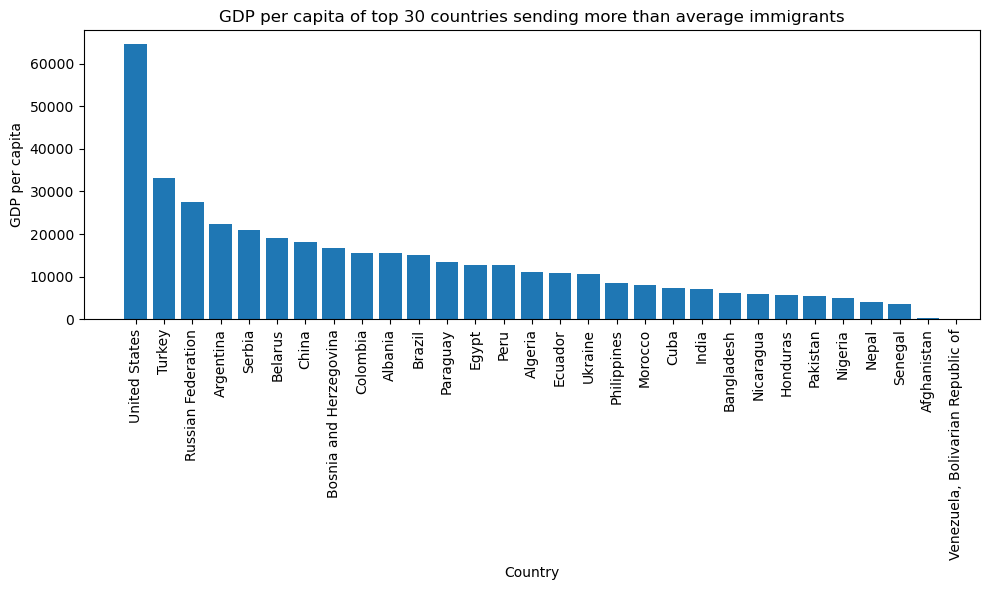

In [52]:
# Average GDP/PC of countries which send more than the average
top_sending = total_by_sending[total_by_sending['Flow'] > (total_by_sending['Flow'].mean())].sort_values(by='Sending_gdppc', ascending=False)

average_gdppc= top_sending['Sending_gdppc'].mean()
display(average_gdppc)

#Plot
plt.figure(figsize=(10, 6))
plt.bar(top_sending['Sending_Country'], top_sending['Sending_gdppc'])
plt.xlabel('Country')
plt.ylabel('GDP per capita')
plt.title('GDP per capita of top 30 countries sending more than average immigrants')
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
plt.tight_layout()
plt.show()


## Further Analysis

Following this objective, the project aims to incorporate other indicators, which are imported above, into the migration dataset (immig_noneu27). These indicators include socio-economic and political variables such as Multidimensional Poverty Measure, Political Stability Indicators, Gender Inequality Index, Conflict Indicators (Battles, Riots, and Violence against Civilians), Climate Risk Index, and Gender Inequality Index.

After this stage, the project's objective shifts to constructing a statistical model to forecast migration flows to EU27 countries using these indicators.

The initial comprehensive model will treat migration flows as the continuous dependent variable, while considering socio-economic and environmental factors as independent variables. Through this analysis, the project aims to illuminate the intricate relationship between migration patterns and socio-economic and environmental conditions, and reveal which of the variables have a statisticaly significant effect on the migration flows to the EU countries.

The subsequent model will replicate the initial model, but will restrict the analysis to sending countries from the Middle East, Africa, and West Asia. This limitation will allow for an examination of whether similar dynamics persist within a narrower scope.

Overall, your text is well-structured and effectively conveys the objectives and methodology of your project.
